In [1]:
import pyspark

In [2]:
from pyspark import SparkContext, SparkConf

In [3]:
!hdfs dfsadmin -safemode leave

2023-12-13 16:41:38 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Safe mode is OFF


In [4]:
conf = SparkConf().set("spark.executor.instances", "2").set("spark.executor.cores", "1").set("spark.executor.memory", "1g")

In [5]:
sc = SparkContext(appName="Denisov_spark", master="yarn")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/13 16:42:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/13 16:42:12 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [7]:
sc.uiWebUrl

'http://bdd116705fd2:4040'

# RDD

## Как создать RDD?

### 1. Распределить коллекцию с драйвера

In [8]:
import numpy as np

In [9]:
vocabulary = ["Apache", "Spark", "Hadoop"]
numbers = np.random.randint(10, size=10000)
words = np.random.choice(vocabulary, size=10000)
collection = zip(numbers, words)

In [10]:
rdd = sc.parallelize(collection)

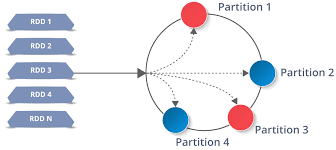

In [11]:
rdd

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [12]:
rdd.count()

10000

In [13]:
rdd.getNumPartitions()

2

In [14]:
rdd.take(7000)

[(8, 'Hadoop'),
 (9, 'Hadoop'),
 (2, 'Hadoop'),
 (2, 'Hadoop'),
 (8, 'Apache'),
 (6, 'Hadoop'),
 (9, 'Apache'),
 (0, 'Apache'),
 (1, 'Spark'),
 (1, 'Apache'),
 (7, 'Spark'),
 (0, 'Spark'),
 (7, 'Apache'),
 (3, 'Hadoop'),
 (8, 'Hadoop'),
 (0, 'Apache'),
 (2, 'Apache'),
 (4, 'Hadoop'),
 (6, 'Hadoop'),
 (9, 'Hadoop'),
 (4, 'Hadoop'),
 (0, 'Spark'),
 (4, 'Hadoop'),
 (9, 'Apache'),
 (4, 'Hadoop'),
 (3, 'Spark'),
 (7, 'Spark'),
 (3, 'Apache'),
 (5, 'Spark'),
 (2, 'Hadoop'),
 (7, 'Spark'),
 (7, 'Hadoop'),
 (7, 'Apache'),
 (9, 'Apache'),
 (6, 'Hadoop'),
 (0, 'Apache'),
 (2, 'Spark'),
 (7, 'Hadoop'),
 (6, 'Hadoop'),
 (5, 'Spark'),
 (4, 'Apache'),
 (6, 'Apache'),
 (8, 'Hadoop'),
 (0, 'Apache'),
 (0, 'Hadoop'),
 (7, 'Hadoop'),
 (2, 'Hadoop'),
 (0, 'Hadoop'),
 (1, 'Hadoop'),
 (4, 'Apache'),
 (4, 'Hadoop'),
 (8, 'Spark'),
 (8, 'Hadoop'),
 (4, 'Hadoop'),
 (3, 'Apache'),
 (3, 'Apache'),
 (8, 'Apache'),
 (8, 'Apache'),
 (8, 'Apache'),
 (7, 'Hadoop'),
 (4, 'Hadoop'),
 (2, 'Hadoop'),
 (6, 'Hadoop'),
 (8

#### Единицей вычислений в спарке выступает партиция

In [15]:
sc.parallelize(range(10)).take(9)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [16]:
sc.parallelize(range(10)).glom().collect()

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]

In [17]:
rdd.getNumPartitions()

2

### 2. Загрузить внешний датасет (датасет загружается из hdfs)

In [18]:
!hdfs dfs -rm -r ml-latest-small

2023-12-13 17:41:20 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
rm: `ml-latest-small': No such file or directory


In [19]:
!hdfs dfs -put ml-latest-small .

2023-12-13 17:41:22 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [23]:
!hdfs dfs -ls ml-latest-small

2023-12-13 17:43:14 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 5 items
-rw-r--r--   3 root supergroup       8342 2023-12-13 17:41 ml-latest-small/README.txt
-rw-r--r--   3 root supergroup     197979 2023-12-13 17:41 ml-latest-small/links.csv
-rw-r--r--   3 root supergroup     494431 2023-12-13 17:41 ml-latest-small/movies.csv
-rw-r--r--   3 root supergroup    2483723 2023-12-13 17:41 ml-latest-small/ratings.csv
-rw-r--r--   3 root supergroup     118660 2023-12-13 17:41 ml-latest-small/tags.csv


In [31]:
rdd_ratings = sc.textFile("ml-latest-small/ratings.csv")

In [32]:
rdd_ratings.count() # 1 stage with 2 tasks

100837

In [33]:
rdd_ratings.take(10)

['userId,movieId,rating,timestamp',
 '1,1,4.0,964982703',
 '1,3,4.0,964981247',
 '1,6,4.0,964982224',
 '1,47,5.0,964983815',
 '1,50,5.0,964982931',
 '1,70,3.0,964982400',
 '1,101,5.0,964980868',
 '1,110,4.0,964982176',
 '1,151,5.0,964984041']

In [34]:
rdd_tags = sc.textFile("ml-latest-small/tags.csv")

In [35]:
rdd_tags.count() # 1 stage with 2 tasks

3684

In [36]:
rdd_tags.take(10)

['userId,movieId,tag,timestamp',
 '2,60756,funny,1445714994',
 '2,60756,Highly quotable,1445714996',
 '2,60756,will ferrell,1445714992',
 '2,89774,Boxing story,1445715207',
 '2,89774,MMA,1445715200',
 '2,89774,Tom Hardy,1445715205',
 '2,106782,drugs,1445715054',
 '2,106782,Leonardo DiCaprio,1445715051',
 '2,106782,Martin Scorsese,1445715056']